# Table of Contents
 <p>

In [1]:
"""
Created on Wen Feb 13 2019

@author: Jenna Vergeynst
"""

import numpy as np
import pandas as pd
import glob
%matplotlib notebook
import matplotlib.pyplot as plt

from Prepare_toa_data import *

In [2]:
# read in temperature data (usually with pd.read_csv)
temperature = pd.read_pickle('temperature_data_example.pkl')

# read in synchronised detection data of all rceivers (usually with pd.read_csv)
recs_df = pd.read_pickle('receiver_data_example.pkl')

# get list of possible receiver names
rec_list = recs_df.receiver_SN.unique()


<IPython.core.display.Javascript object>


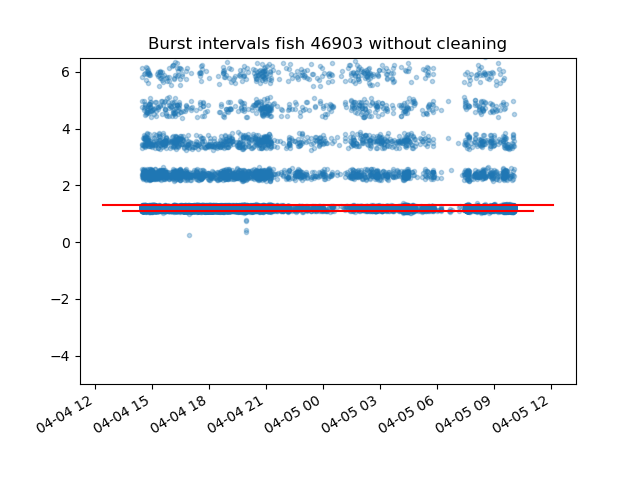

<IPython.core.display.Javascript object>


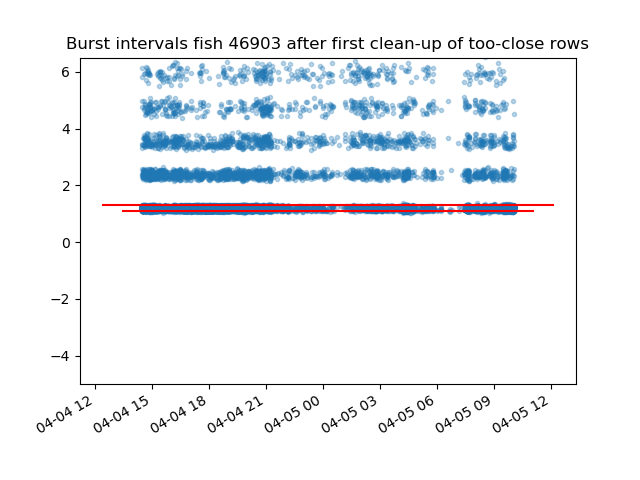

<IPython.core.display.Javascript object>


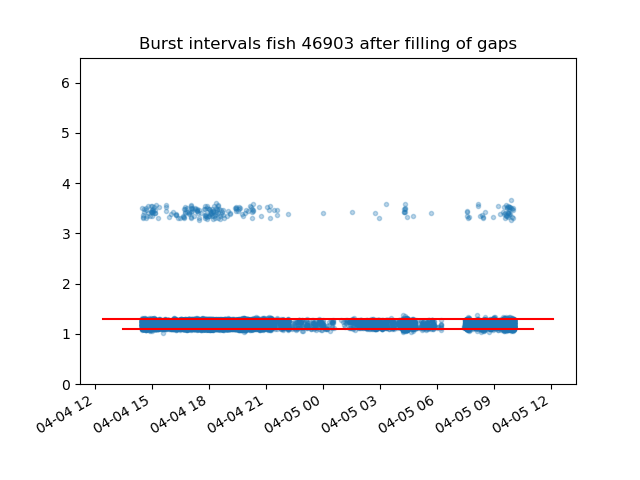

<IPython.core.display.Javascript object>


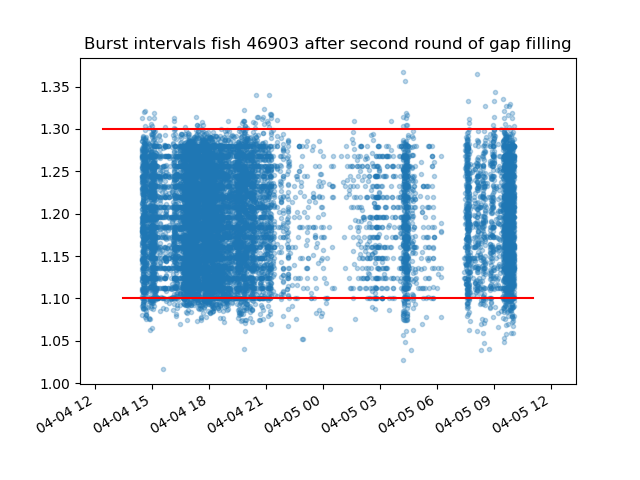

In [3]:
ID = 46903
# for random burst intervals: give minimum and maximum burst interval
min_burst = 1.1
max_burst = 1.3
# take part of the dataframe that only contains detections of one tag
tag_data = recs_df[recs_df.Id == ID].copy()

# If the below gives an error and filled_toa is empty => decrease min_track_length
rec_cols, toa_data, cleaned_toa_data, filled_toa, final_toa = create_final_toa(tag_data=tag_data, max_time=0.2, min_burst=min_burst, max_burst=max_burst,
                                                                               time_col='SyncTime', rec_col='receiver_SN', rec_list=rec_list,
                                                                               temp=temperature, temp_time_col='Time', temp_temp_col='Ambient (deg C)',
                                                                               pas_tol=5, min_track_length=120)

# The resulting dataframe can be used as input for yaps
final_toa_df = pd.concat(final_toa).set_index('groups_pas').drop(columns='groups_obs')
final_toa_df.to_csv('TOA_'+str(ID)+'.csv')

# Check visually the evolution in the different steps. In the final_toa,
# the time differences between 2 lines of the dataframe should be within min and max burst
create_plots(ID=ID, min_burst=min_burst, max_burst=max_burst, rec_cols=rec_cols, toa_data=toa_data,
             cleaned_toa_data=cleaned_toa_data, filled_toa=filled_toa, final_toa=final_toa,
             write_path='./', time_col='SyncTime', plot='on')
